In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import quandl

bitcoin_original = quandl.get("BCHAIN/MKPRU")


In [3]:
bitcoin = bitcoin_original.copy()
bitcoin.columns = ['Close']
#bitcoin['sma'] = bitcoin['Close'].rolling(window=5).mean()
bitcoin['Close'].replace(0, np.nan, inplace=True)
bitcoin = bitcoin.dropna()


In [4]:
ahora = bitcoin[2123:]

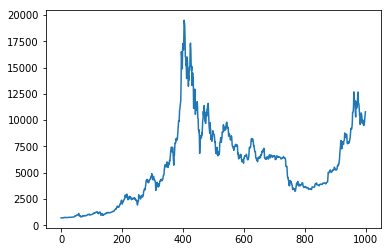

In [251]:
import matplotlib.pyplot as plt

plt.plot(ahora.Close[-1000:].values)
#xs[0].bar(names, values)
#xs[1].scatter(names, values)
#xs[2].plot(names, values)
#ig.suptitle('Categorical Plotting')

In [258]:
els = ahora.Close[-1000:].values

def localmin(els, start=0):
    for i in range(start + 1, len(els) - 1):
        if els[i] < els[i - 1] and els[i + 1] > els[i]:
            return i
    
    return False


def localmax(els, start=0):
    for i in range(start + 1, len(els) - 1):
        if els[i] > els[i - 1] and els[i + 1] < els[i]:
            return i
    
    return False

mins = []

_min = localmin(els)
while _min:
    mins.append(_min)
    _min = localmin(els, _min)

maxs = []
_max = localmax(els)
while _max:
    maxs.append(_max)
    _max = localmax(els, _max)



In [90]:
a=[4,5,6]
a[1:3]

[5, 6]

NameError: name 'dsad' is not defined

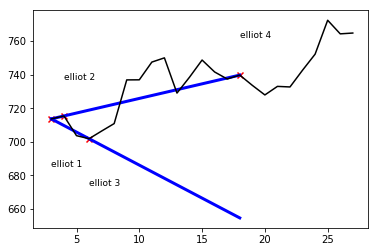

In [259]:
#objetivo, que se cumpla la onda 5!
#bull combination

def reg(x, y):
    return LinearRegression().fit(np.array([x]).reshape(-1, 1), np.array(y))

waves = []

for elliot1 in mins:
    for elliot2 in maxs:
        if elliot2 <= elliot1:
            continue
        for elliot3 in mins:
            if elliot3 <= elliot2:
                continue
            for elliot4 in maxs:
                if elliot4 <= elliot3:
                    continue
                
                               
                upper = [elliot2, elliot4]
                lower = [elliot1, elliot3]
                upperReg = reg(upper, list(map(lambda x: els[x], upper)))
                lowerReg = reg(lower, list(map(lambda x: els[x], lower)))
                
                y_predlower = lowerReg.predict(np.array(range(elliot1, elliot4+1)).reshape(-1, 1))
                y_predupper = upperReg.predict(np.array(range(elliot1, elliot4+1)).reshape(-1, 1))
                
                if y_predlower[0] > y_predupper[0]:
                    continue
                    
                if y_predlower[elliot4-elliot1] > y_predupper[elliot4-elliot1]:
                    continue
                    
                
                upperError=0
                for i in range(elliot2 + 1, elliot4):
                    if y_predlower[i - elliot2] < els[i]:
                        upperError = max(upperError, abs((y_predupper[i - elliot2] - els[i]) / els[i]))
    
                lowerError=0
            
                for i in range(elliot1 + 1, elliot3):
                    if y_predlower[i - elliot1] > els[i]:
                        lowerError = max(lowerError, abs((y_predlower[i - elliot1] - els[i]) / els[i]))

            
                if upperError > 0.04:
                    continue
                if lowerError > 0.04:
                    continue
                waves.append([elliot1,elliot2,elliot3,elliot4])
                plt.plot(np.array(range(elliot1, elliot4+1)), y_predupper, color='blue', linewidth=3)
                plt.plot(np.array(range(elliot1, elliot4+1)), y_predlower, color='blue', linewidth=3)
                plt.plot(range(elliot1, elliot4+10), els[elliot1:elliot4+10],  color='black')
                plt.text(elliot1, els[elliot1] * .96, 'elliot 1', fontsize=9)
                plt.scatter(elliot1, els[elliot1], marker='x', color='red')
                
                plt.text(elliot2, els[elliot2] * 1.03, 'elliot 2', fontsize=9)
                plt.scatter(elliot2, els[elliot2], marker='x', color='red')

                plt.text(elliot3, els[elliot3] * .96, 'elliot 3', fontsize=9)
                plt.scatter(elliot3, els[elliot3], marker='x', color='red')
                
                plt.text(elliot4, els[elliot4] * 1.03, 'elliot 4', fontsize=9)
                plt.scatter(elliot4, els[elliot4], marker='x', color='red')
                #for i in range(elliot)
            
                dsad

0.019977758686678455


NameError: name 'dsad' is not defined

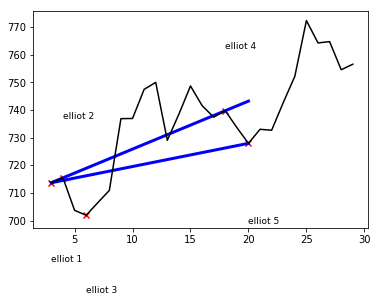

In [344]:
#objetivo, que se cumpla la onda 5!
#bull combination
from tqdm import tqdm_notebook as tqdm


def reg(x, y):
    return LinearRegression().fit(np.array([x]).reshape(-1, 1), np.array(y))

waves = []

for elliot1 in tqdm(mins):
    for elliot2 in maxs:
        if elliot2 <= elliot1:
            continue
        if (elliot2 - elliot1) > 100:
            continue
        for elliot3 in mins:
            if elliot3 <= elliot2:
                continue
            if (elliot3 - elliot2) > 100:
                continue
            for elliot4 in maxs:
                if elliot4 <= elliot3:
                    continue
                if (elliot4 - elliot3) > 100:
                        continue
                for elliot5 in mins:
                    if elliot5 <= elliot4:
                        continue
                    if (elliot5 - elliot4) > 100:
                        continue
                    upper = [elliot2, elliot4]
                    lower = [elliot1, elliot5]
                    upperReg = reg(upper, list(map(lambda x: els[x], upper)))
                    lowerReg = reg(lower, list(map(lambda x: els[x], lower)))
                
                    y_predlower = lowerReg.predict(np.array(range(elliot1, elliot5+1)).reshape(-1, 1))
                    y_predupper = upperReg.predict(np.array(range(elliot1, elliot5+1)).reshape(-1, 1))
                
                    if y_predlower[0] > y_predupper[0]:
                        continue
                    
                    if y_predlower[elliot5-elliot1] > y_predupper[elliot5-elliot1]:
                        continue
                    
                
                    upperError=abs(min((y_predupper-els[elliot1:elliot5+1] ) / y_predupper))
                    lowerError=abs(min((els[elliot1:elliot5+1] - y_predlower) / y_predlower))
            
                    
                    if upperError > 0.03:
                        continue
                    if lowerError > 0.03:
                        continue
                    print(lowerError)
                    waves.append([elliot1,elliot2,elliot3,elliot4,elliot5])
                    
                    plt.plot(np.array(range(elliot1, elliot5+1)), y_predupper, color='blue', linewidth=3)
                    plt.plot(np.array(range(elliot1, elliot5+1)), y_predlower, color='blue', linewidth=3)
                    plt.plot(range(elliot1, elliot5+10), els[elliot1:elliot5+10],  color='black')
                    plt.text(elliot1, els[elliot1] * .96, 'elliot 1', fontsize=9)
                    plt.scatter(elliot1, els[elliot1], marker='x', color='red')

                    plt.text(elliot2, els[elliot2] * 1.03, 'elliot 2', fontsize=9)
                    plt.scatter(elliot2, els[elliot2], marker='x', color='red')

                    plt.text(elliot3, els[elliot3] * .96, 'elliot 3', fontsize=9)
                    plt.scatter(elliot3, els[elliot3], marker='x', color='red')

                    plt.text(elliot4, els[elliot4] * 1.03, 'elliot 4', fontsize=9)
                    plt.scatter(elliot4, els[elliot4], marker='x', color='red')

                    plt.text(elliot5, els[elliot5] * .96, 'elliot 5', fontsize=9)
                    plt.scatter(elliot5, els[elliot5], marker='x', color='red')
                    #for i in range(elliot)

                    dsad

In [356]:
y_predupper,els[elliot1:elliot5+1]



(array([713.71214286, 715.45      , 717.18785714, 718.92571429,
        720.66357143, 722.40142857, 724.13928571, 725.87714286,
        727.615     , 729.35285714, 731.09071429, 732.82857143,
        734.56642857, 736.30428571, 738.04214286, 739.78      ,
        741.51785714, 743.25571429]),
 array([713.69, 715.45, 703.71, 701.9 , 706.46, 710.91, 736.91, 736.96,
        747.52, 750.03, 729.06, 738.53, 748.74, 741.63, 737.45, 739.78,
        733.67, 727.96]))

In [359]:
(736.30 - 748.74) / 736.30

-0.016895287247046115

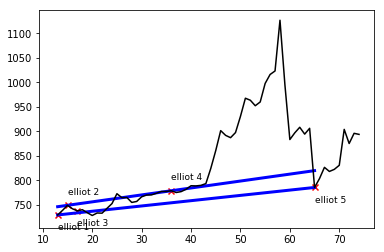

In [293]:
from random import randint
n = randint(0, len(waves) -1)
    
[elliot1,elliot2,elliot3,elliot4,elliot5] = waves[n]

upper = [elliot2, elliot4]
lower = [elliot1, elliot5]
upperReg = reg(upper, list(map(lambda x: els[x], upper)))
lowerReg = reg(lower, list(map(lambda x: els[x], lower)))

y_predlower = lowerReg.predict(np.array(range(elliot1, elliot5+1)).reshape(-1, 1))
y_predupper = upperReg.predict(np.array(range(elliot1, elliot5+1)).reshape(-1, 1))


plt.plot(np.array(range(elliot1, elliot5+1)), y_predupper, color='blue', linewidth=3)
plt.plot(np.array(range(elliot1, elliot5+1)), y_predlower, color='blue', linewidth=3)
plt.plot(range(elliot1, elliot5+10), els[elliot1:elliot5+10],  color='black')
plt.text(elliot1, els[elliot1] * .96, 'elliot 1', fontsize=9)
plt.scatter(elliot1, els[elliot1], marker='x', color='red')

plt.text(elliot2, els[elliot2] * 1.03, 'elliot 2', fontsize=9)
plt.scatter(elliot2, els[elliot2], marker='x', color='red')

plt.text(elliot3, els[elliot3] * .96, 'elliot 3', fontsize=9)
plt.scatter(elliot3, els[elliot3], marker='x', color='red')

plt.text(elliot4, els[elliot4] * 1.03, 'elliot 4', fontsize=9)
plt.scatter(elliot4, els[elliot4], marker='x', color='red')

plt.text(elliot5, els[elliot5] * .96, 'elliot 5', fontsize=9)
plt.scatter(elliot5, els[elliot5], marker='x', color='red')


0.06436298226535604
0.012477982644047012


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

e1 = mins[0]
e3 = mins[1]
e5 = mins[2]

model = LinearRegression().fit(np.array([e1, e3, e5]).reshape(-1, 1), np.array([els[e1], els[e3], els[e5]]))
model.score(np.array([[e1], [e3], [e5]]).reshape(-1, 1), [els[e1], els[e3], els[e5]])

0.9914542121226977

Coefficients: 
 [71.74071499]
Mean squared error: 77021126.70
Variance score: -101369.95
0.6368224617780247


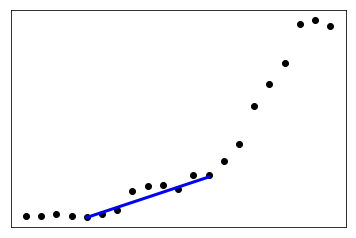

In [79]:

# Make predictions using the testing set
y_pred = model.predict(np.array(mins).reshape(-1, 1))

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(np.array(mins).reshape(-1, 1), y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(np.array(maxs).reshape(-1, 1), y_pred))
print(model.score(np.array(maxs[0:3]).reshape(-1, 1), list(map(lambda x: els[x], maxs[0:3]))))



# Plot outputs
plt.scatter(range(0, mins[3]),els[0:mins[3]],  color='black')
plt.plot(np.array(mins[0:3]).reshape(-1, 1), y_pred[0:3], color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [46]:
primerHalving = bitcoin[803:2123]

# 2016-6-9 
ahora = bitcoin[2123:]


In [31]:
primerHalving.Close

Date
2012-10-28     10.61000
2012-10-29     10.95000
2012-10-30     10.85000
2012-10-31     11.14000
2012-11-01     11.27900
2012-11-02     11.20999
2012-11-03     10.60097
2012-11-04     10.68000
2012-11-05     10.90000
2012-11-06     10.88997
2012-11-07     11.21603
2012-11-08     11.09790
2012-11-09     11.07000
2012-11-10     10.95899
2012-11-11     10.93900
2012-11-12     11.18000
2012-11-13     11.12900
2012-11-14     11.05000
2012-11-15     11.11400
2012-11-16     11.80000
2012-11-17     11.80000
2012-11-18     11.83200
2012-11-19     11.79998
2012-11-20     11.84000
2012-11-21     11.78400
2012-11-22     12.28000
2012-11-23     12.43000
2012-11-24     12.41080
2012-11-25     12.60000
2012-11-26     12.65150
                ...    
2016-05-10    461.63000
2016-05-11    450.00000
2016-05-12    452.51000
2016-05-13    454.70000
2016-05-14    456.82000
2016-05-15    455.65000
2016-05-16    457.08000
2016-05-17    454.88000
2016-05-18    452.89000
2016-05-19    452.90000
2016-05-20 

In [38]:
ahora['change'] = ahora.Close.pct_change().values
ahora['cum']  = ahora.Close.pct_change().cumsum().values

primerHalving['change'] = primerHalving.Close.pct_change().values
primerHalving['cum']  = primerHalving.Close.pct_change().cumsum().values

len(ahora),len(primerHalving)

/home/eugenio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/eugenio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/eugenio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

(1150, 1320)

In [42]:
primerHalving['changePrice'] = ((primerHalving.Close - 10.61) / 10.61)
ahora['changePrice'] = ((ahora.Close - 578.68) / 578.68)


/home/eugenio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/eugenio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


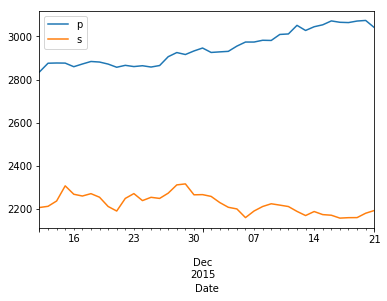

In [33]:
pd.DataFrame({ "p":primerHalving[0:len(ahora)]['cum'] * 578.68, "s":ahora[:]['cum'].values * 578.68})[1110:].plot()

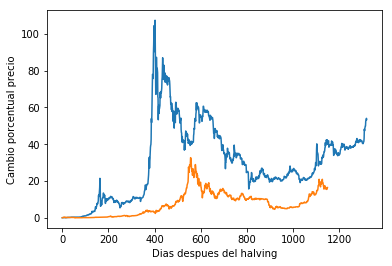

In [71]:
import matplotlib.pyplot as plt
plt.plot((primerHalving[:]['changePrice']).values)
plt.plot((ahora[:]['changePrice']).values)
plt.ylabel('Cambio porcentual precio')
plt.xlabel('Dias despues del halving')
plt.show()


#(primerHalving[:]['cum'] * 578.68).plot()
#(ahora[:]['cum'] * 578.68)[1110:].values.plot()

/home/eugenio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/eugenio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


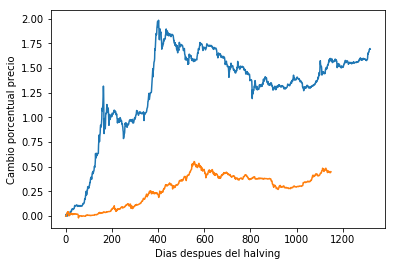

In [69]:
primerHalving['changePriceLog'] = ((np.log(primerHalving.Close) - np.log(10.61)) / np.log(10.61))
ahora['changePriceLog'] = ((np.log(ahora.Close) - np.log(578.68)) / np.log(578.68))


import matplotlib.pyplot as plt
plt.plot((primerHalving[:]['changePriceLog']).values)
plt.plot((ahora[:]['changePriceLog']).values)
plt.ylabel('Cambio porcentual precio')
plt.xlabel('Dias despues del halving')
plt.show()



In [73]:
max((ahora[:]['Close']))
#max(bitcoin.Close)
#pd.DataFrame({"a":ahora.Close, "b": (ahora[:]['changePrice'] * 578.68)+578.68})

19498.6833333

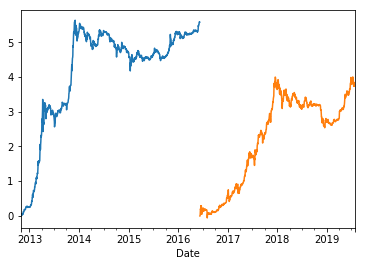

In [74]:
primerHalving['cum'].plot()
ahora['cum'].plot()

## Con la curva trazada hago una prediccion del fururo

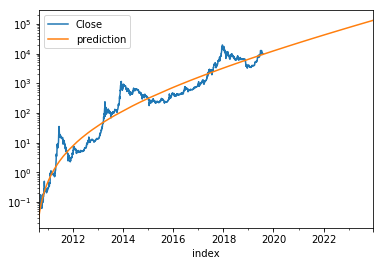

In [4]:
index_future = pd.date_range(start='2010-08-17', end='2023-12-30')
future = np.exp(func(np.arange(0,len(index_future)), *popt))

futurepd = pd.DataFrame.from_dict({"index": index_future, "prediction": future});
futurepd = futurepd.set_index('index')
futurepd.join(bitcoin)[['Close', 'prediction']].plot(logy=True)

## Mismo grafico pero sin escala logaritmica... llegamos al millon para 2027?!?!?

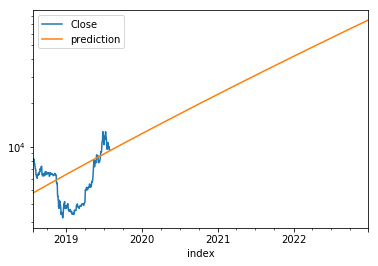

In [5]:
futurepd.join(bitcoin)[['Close', 'prediction']][2900:][:-370].plot(logy=True)

## Parece que si... salgan a comprar ya!

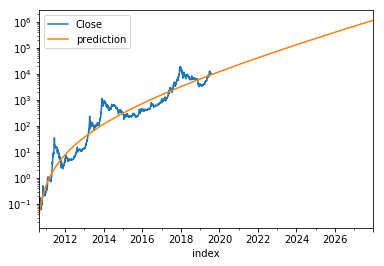

In [12]:
index_future = pd.date_range(start='2010-08-17', end='2027-12-30')
future = np.exp(func(np.arange(0,len(index_future)), *popt))

futurepd = pd.DataFrame.from_dict({"index": index_future, "prediction": future});
futurepd = futurepd.set_index('index')
futurepd.join(bitcoin)[['Close', 'prediction']].plot(logy=True)

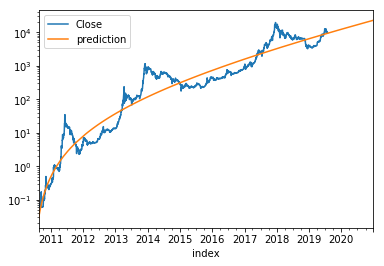

In [10]:
index_future = pd.date_range(start='2010-08-17', end='2020-12-30')
future = np.exp(func(np.arange(0,len(index_future)), *popt))

futurepd = pd.DataFrame.from_dict({"index": index_future, "prediction": future});
futurepd = futurepd.set_index('index')
futurepd.join(bitcoin)[['Close', 'prediction']].plot(logy=True)